<h1 style="color:orange">EXERCISE CLASS 5 - Principal Component Analysis (PCA) </h1>



# EXERCISE 1

A pencil producer performs a process control by using 3 quality charcateristics. 
1. Pencil diameter
2. Ultimate tensile strength
3. The ease of sliding on paper (glide)

Perform a Principal Component Analysis for these data.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
data = pd.read_csv('ESE05_ex1.csv')

# Print the first 5 rows of the dataset
data.head()

,Diameter,Tensile str,Glide
0,0.273367,0.091167,0.064700
1,-0.526633,-0.125500,-0.548633
2,0.240033,0.244500,0.281367
3,-0.259967,-0.018833,0.408033
4,-0.093300,-0.078833,-0.265300


> Reminder:
> - Dataset $X$ is a $n \times p$ matrix, where $n$ is the number of observations, and $p$ is the number of variables.
> - The sample variance-covariance matrix $S$ is a $p \times p$ matrix.
> - The sample correlation matrix $R$ is a $p \times p$ matrix.
>
> Eigendecomposition of $S$:
> - Eigenvalues is a $p \times 1$ vector, $\lambda_1, \lambda_2, \dots, \lambda_p$ (explained variance).
> - Eigenvectors is a $p \times p$ matrix, $\mathbf{u_1}, \mathbf{u_2}, \dots, \mathbf{u_p}$ (loadings).
> $$ \mathbf{u_1} = [u_{11}, u_{12}, \dots, u_{1p}]^T$$
> $$ \mathbf{u_2} = [u_{21}, u_{22}, \dots, u_{2p}]^T$$
> $$ \vdots$$
> $$ \mathbf{u_p} = [u_{p1}, u_{p2}, \dots, u_{pp}]^T$$
> - Projection of data onto the space spanned by the PCs (scores) ($n \times p$ matrix):
> $$ \mathbf{z_1} = [z_{11}, z_{21}, \dots, z_{n1}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_1}$$
> $$ \mathbf{z_2} = [z_{12}, z_{22}, \dots, z_{n2}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_2}$$
> $$ \vdots$$
> $$ \mathbf{z_p} = [z_{1p}, z_{2p}, \dots, z_{np}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_p}$$

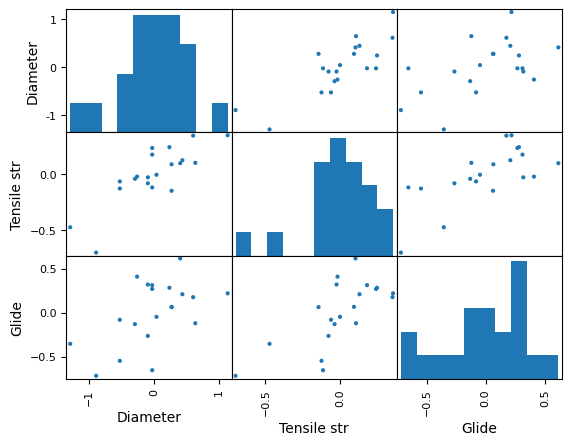

In [2]:
# Create a correlation plot of the dataset
pd.plotting.scatter_matrix(data, alpha = 1)
plt.show()

> We can also compute the variance covariance matrix. 

In [3]:
# Create the variance covariance matrix using pandas
cov_matrix = data.cov()
print(cov_matrix)

             Diameter  Tensile str     Glide
Diameter     0.307556     0.114273  0.109546
Tensile str  0.114273     0.063803  0.064642
Glide        0.109546     0.064642  0.131978


> Now we can perform the principal component analysis.

In [4]:
# import the libraries for PCA
from sklearn.decomposition import PCA

# Create the PCA object
pca = PCA()
# Fit the PCA object to the data
pca.fit(data)
# Print the eigenvalues
print("Eigenvalues \n", pca.explained_variance_)
# Print the eigenvectors 
print("\nEigenvectors \n", pca.components_)
# Print the explained variance ratio
print("\nExplained variance ratio \n", pca.explained_variance_ratio_)
# Print the cumulative explained variance ratio
print("\nCumulative explained variance ratio \n", np.cumsum(pca.explained_variance_ratio_))


Eigenvalues 
 [0.40977919 0.08038204 0.01317523]

Eigenvectors 
 [[-0.83887956 -0.35428255 -0.41323717]
 [ 0.47686144 -0.11227839 -0.87177791]
 [ 0.26245809 -0.92837355  0.26313173]]

Explained variance ratio 
 [0.81412578 0.15969842 0.02617579]

Cumulative explained variance ratio 
 [0.81412578 0.97382421 1.        ]


> If we retain the first two PCs we can explain about 97% of observed variability. 

> Projection of data onto the space spanned by the PCs (scores) ($n \times p$ matrix):
> $$ \mathbf{z_1} = [z_{11}, z_{21}, \dots, z_{n1}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_1}$$
> $$ \mathbf{z_2} = [z_{12}, z_{22}, \dots, z_{n2}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_2}$$
> $$ \vdots$$
> $$ \mathbf{z_p} = [z_{1p}, z_{2p}, \dots, z_{np}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_p}$$

> For example, the first score (z1 projection of all data on 1 st PC):
> $$ \mathbf{z_1} = -0.8388 (\mathbf{X_1} - \mathbf{\bar{x}_1}) - 0.354283 (\mathbf{X_2} - \mathbf{\bar{x}_2}) - 0.413237 (\mathbf{X_3} - \mathbf{\bar{x}_3})$$
> In this case, $\mathbf{\bar{x}} = [0, 0, 0]^T$.

In [5]:
# Compute the scores (i.e. all the principal components, n x 3) 
scores = pca.transform(data)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['z1', 'z2', 'z3'])
# Print the first rows of the scores dataframe
scores_df.head()

,z1,z2,z3
0,-0.288315,0.063731,0.004118
1,0.713002,0.241259,-0.166089
2,-0.404211,-0.158266,-0.089970
3,0.056180,-0.477555,0.056603
4,0.215870,0.195656,-0.021127


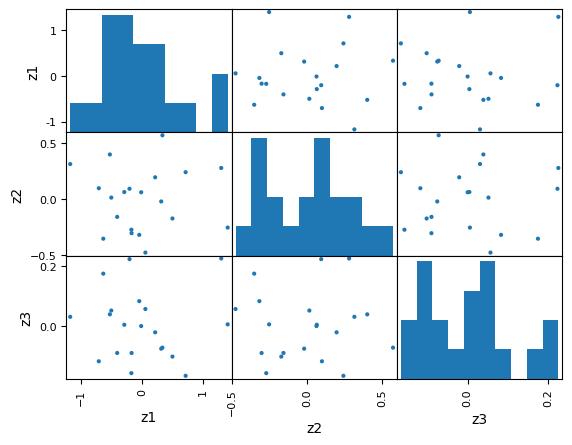

In [6]:
# Plot the scores in a scatter plot
pd.plotting.scatter_matrix(scores_df, alpha = 1)
plt.show()

> Now we can plot the loadings $\mathbf{u_1}$, $\mathbf{u_2}$, $\mathbf{u_3}$.

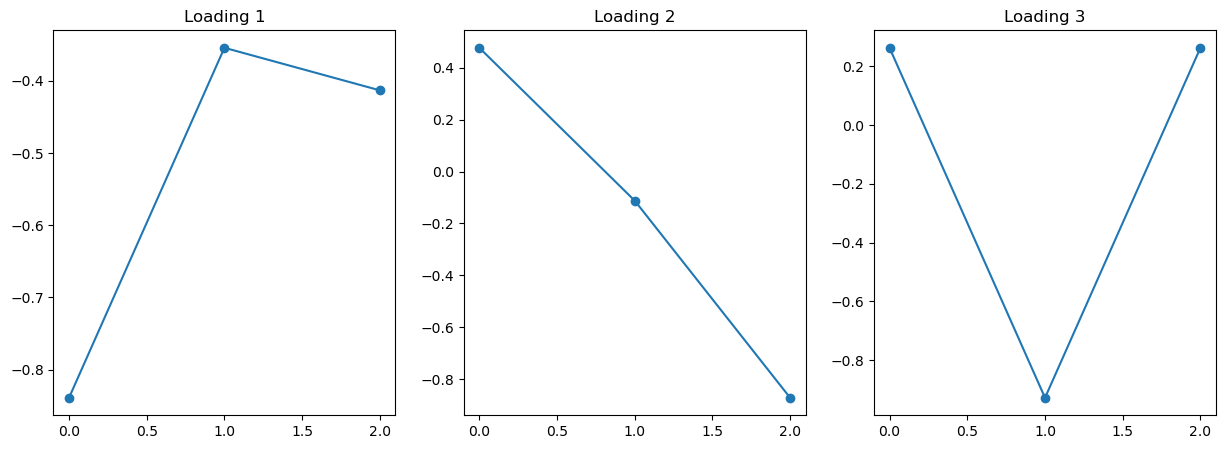

In [7]:
# Plot the loadings
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(pca.components_[0], 'o-')
ax[0].set_title('Loading 1')
ax[1].plot(pca.components_[1], 'o-')
ax[1].set_title('Loading 2')
ax[2].plot(pca.components_[2], 'o-')
ax[2].set_title('Loading 3')
plt.show()


# Exercise 1.1

By using the data of Exercise 1: 
1. Compute the sample correlation matrix.
2. Compute the sample variance covariance matrix of standardised variables and compare the result with the result of point 1. 
3. Apply the PCA by using the correlation matrix and compare the results with the ones obtained applying the PCA to the variance covariance matrix. 

## Point 1

Compute the sample correlation matrix.

> ### Solution

In [8]:
# Compute the correlation matrix of the scores
corr_matrix = data.corr()
print(corr_matrix)

             Diameter  Tensile str     Glide
Diameter     1.000000     0.815757  0.543731
Tensile str  0.815757     1.000000  0.704443
Glide        0.543731     0.704443  1.000000


> Comparison between correlation matrix and variance covariance matrix of input variables.

In [9]:
print(cov_matrix)

             Diameter  Tensile str     Glide
Diameter     0.307556     0.114273  0.109546
Tensile str  0.114273     0.063803  0.064642
Glide        0.109546     0.064642  0.131978


## Point 2

Compute the sample variance covariance matrix of standardised variables and compare the result with the result of point 1. 

> ### Solution
>
> Let's standardise the data.

In [10]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
data_std = (data - data.mean()) / data.std()

data_std.describe()

,Diameter,Tensile str,Glide
count,2.000000e+01,2.000000e+01,2.000000e+01
mean,4.857226e-17,-5.551115e-18,1.110223e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.332108e+00,-2.766650e+00,-1.978228e+00
25%,-4.838523e-01,-3.483881e-01,-4.551025e-01
50%,-4.808470e-02,-4.156903e-02,1.734161e-01
75%,5.529741e-01,5.555734e-01,7.468820e-01
max,2.055621e+00,1.390253e+00,1.691954e+00


> Compute the variance covariance matrix of standardised variables.

In [11]:
cov_matrix_std = data_std.cov()
print(cov_matrix_std)

             Diameter  Tensile str     Glide
Diameter     1.000000     0.815757  0.543731
Tensile str  0.815757     1.000000  0.704443
Glide        0.543731     0.704443  1.000000


> Now compare it with the original correlation matrix.

In [12]:
print(corr_matrix)

             Diameter  Tensile str     Glide
Diameter     1.000000     0.815757  0.543731
Tensile str  0.815757     1.000000  0.704443
Glide        0.543731     0.704443  1.000000


> The sample correlation matrix coincides with the sample variance covariance matrix of standardized variables!

## Point 3
Apply the PCA by using the correlation matrix and compare the results with the ones obtained applying the PCA to the variance covariance matrix. 

> ### Solution
> 
> Apply the PCA on the correlation matrix of the original data.

In [13]:
# Apply the PCA on the correlation matrix instead of the covariance matrix
pca_corr = PCA()
pca_corr.fit(data_std) 
# Compare the eigenvalues
print("Eigenvalues from ORIGINAL data \n", pca.explained_variance_)
print("Eigenvalues from STANDARDIZED data \n", pca_corr.explained_variance_)
# Compare the eigenvectors
print("\nEigenvectors from ORIGINAL data \n", pca.components_)
print("Eigenvectors from STANDARDIZED data \n", pca_corr.components_)
# Compare the explained variance ratio
print("\nExplained variance ratio from ORIGINAL data \n", pca.explained_variance_ratio_)
print("Explained variance ratio from STANDARDIZED data \n", pca_corr.explained_variance_ratio_)
# Compare the cumulative explained variance ratio
print("\nCumulative explained variance ratio from ORIGINAL data \n", np.cumsum(pca.explained_variance_ratio_))
print("Cumulative explained variance ratio from STANDARDIZED data \n", np.cumsum(pca_corr.explained_variance_ratio_))

Eigenvalues from ORIGINAL data 
 [0.40977919 0.08038204 0.01317523]
Eigenvalues from STANDARDIZED data 
 [2.38187043 0.4677083  0.15042127]

Eigenvectors from ORIGINAL data 
 [[-0.83887956 -0.35428255 -0.41323717]
 [ 0.47686144 -0.11227839 -0.87177791]
 [ 0.26245809 -0.92837355  0.26313173]]
Eigenvectors from STANDARDIZED data 
 [[-0.57522581 -0.61469323 -0.53969204]
 [ 0.59207613  0.14236427 -0.79320758]
 [ 0.5644122  -0.77581225  0.28205359]]

Explained variance ratio from ORIGINAL data 
 [0.81412578 0.15969842 0.02617579]
Explained variance ratio from STANDARDIZED data 
 [0.79395681 0.15590277 0.05014042]

Cumulative explained variance ratio from ORIGINAL data 
 [0.81412578 0.97382421 1.        ]
Cumulative explained variance ratio from STANDARDIZED data 
 [0.79395681 0.94985958 1.        ]


> **Different PCs**
>
> The eigenvalues and eigenvectors of the correlation matrix have no simple relationship with those of the corresponding covariance matrix. 
>
> The PCs for correlation and covariance matrices do not, therefore, give equivalent information, nor can they be derived directly from each other. 

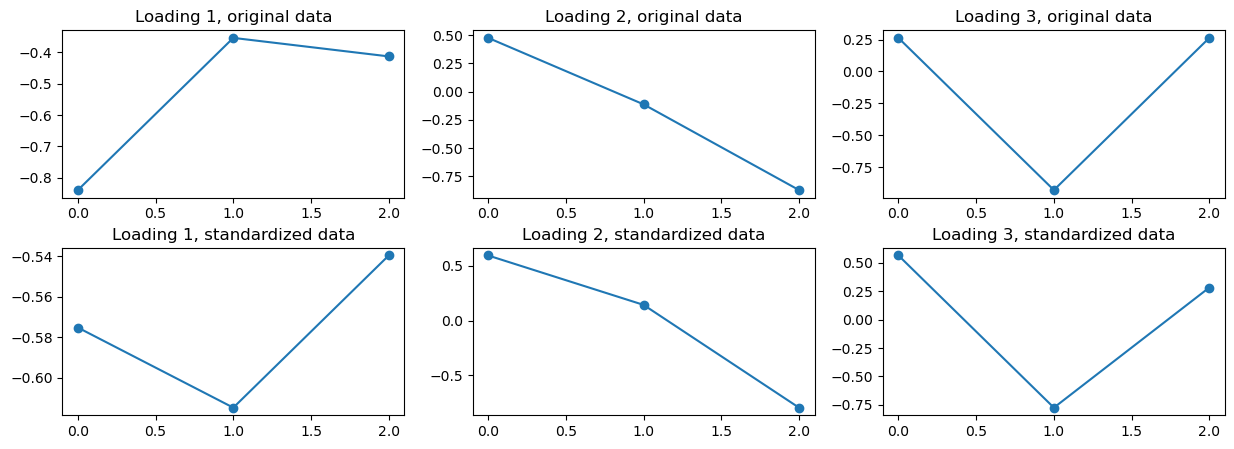

In [14]:
# Plot the loadings of original and standardized data
fig, ax = plt.subplots(2, 3, figsize = (15, 5))
ax[0, 0].plot(pca.components_[0], 'o-')
ax[0, 0].set_title('Loading 1, original data')
ax[0, 1].plot(pca.components_[1], 'o-')
ax[0, 1].set_title('Loading 2, original data')
ax[0, 2].plot(pca.components_[2], 'o-')
ax[0, 2].set_title('Loading 3, original data') 
ax[1, 0].plot(pca_corr.components_[0], 'o-')
ax[1, 0].set_title('Loading 1, standardized data')
ax[1, 1].plot(pca_corr.components_[1], 'o-')
ax[1, 1].set_title('Loading 2, standardized data')
ax[1, 2].plot(pca_corr.components_[2], 'o-')
ax[1, 2].set_title('Loading 3, standardized data')
fig.subplots_adjust(hspace = 0.3)
plt.show()

> Note how the value of the first loading $u_{11}$ was the one with the largest variance when we applied the PCA to the original (non standardised) data.

> A few considerations: 
> - If the input variables are on different scales/units, PCA on standardized data should be applied to avoid undesired effects, i.e., scale effects, on individual variances.
> - If there are large differences between the variances of the elements of $\mathbf{X}$, then those variables whose variances are largest will tend to dominate the first few PCs. 
> - If the input variables are in the same scale with similar variance, both PCA on original and standardized data may be applied, but they will yield different results. 